The dataset used for this project comes from kaggle (https://www.kaggle.com/datasets/pradip11/amexpert-codelab-2021?select=test.csv), it comes already separated into train and test sets; although, the test csv is lacking the feature we will be predicting. The dataset comes from and is owned by American Express.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

figures_dir = "../../figures"
os.makedirs(figures_dir, exist_ok=True)

# Loop over all open figures and save them
for i, fig_num in enumerate(plt.get_fignums(), 1):
    fig = plt.figure(fig_num)
    fig.savefig(f"{figures_dir}/figure_{i}.png", dpi=300, bbox_inches='tight')

In [4]:
train = pd.read_csv("../../data/raw/train.csv")
test = pd.read_csv("../../data/raw/test.csv")

In [5]:
# Shape and column info
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("\nTrain columns:\n", train.columns)

# View first few rows
train.head()

Train shape: (45528, 19)
Test shape: (11383, 18)

Train columns:
 Index(['customer_id', 'name', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')


,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [6]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

no_of_children          774
owns_car                547
no_of_days_employed     463
yearly_debt_payments     95
migrant_worker           87
total_family_members     83
credit_score              8
dtype: int64

In [7]:
print("\nTest columns:\n", test.columns)


Test columns:
 Index(['customer_id', 'name', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months'],
      dtype='object')


In [8]:
missing_test = test.isnull().sum()
missing_test = missing[missing > 0].sort_values(ascending=False)
missing_test

no_of_children          774
owns_car                547
no_of_days_employed     463
yearly_debt_payments     95
migrant_worker           87
total_family_members     83
credit_score              8
dtype: int64

Low rate of missingness is good to see, it may be safe to impute some of the missing values as 0. Such as number of children, it may be reasonable to assume missingness in children means there are no children, but this should still be tested.

In [10]:
train.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


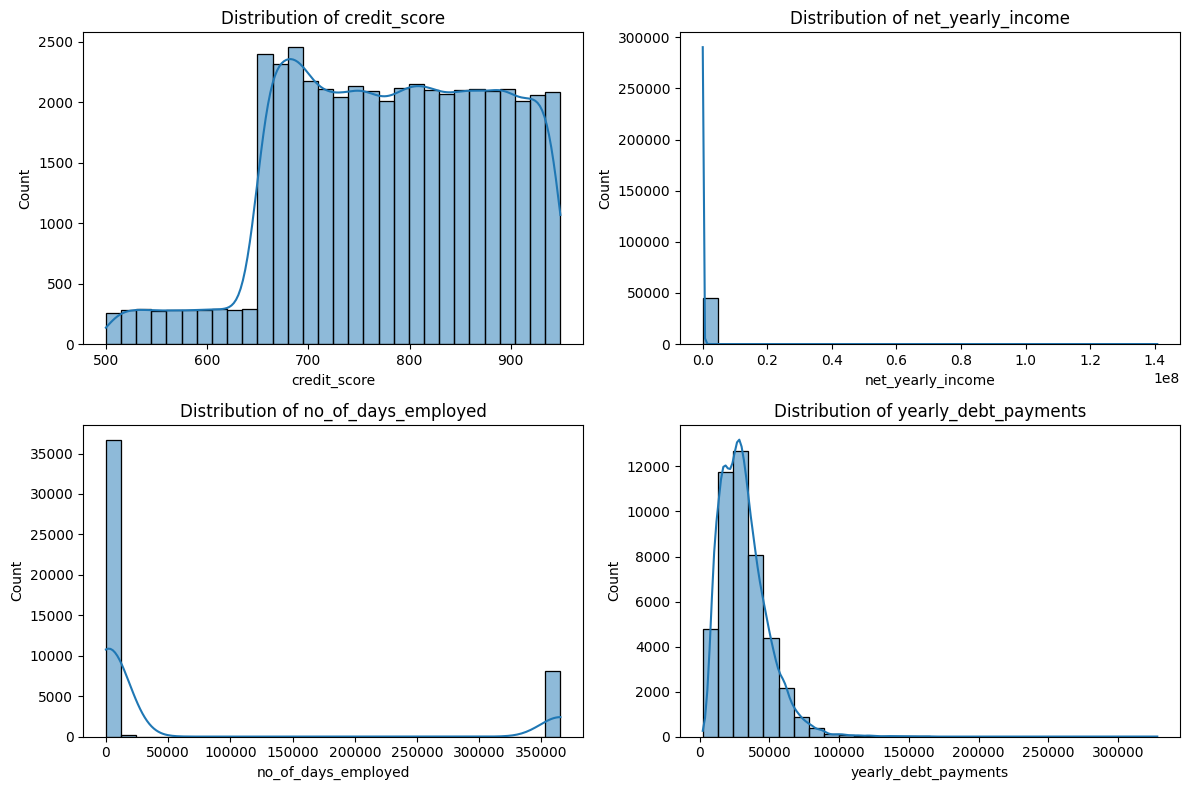

In [11]:
key_features = ['credit_score', 'net_yearly_income', 'no_of_days_employed', 'yearly_debt_payments']

plt.figure(figsize=(12,8))
for i, col in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()

plt.savefig("../../figures/distribution_of_data.png", dpi=300, bbox_inches='tight')
plt.show()

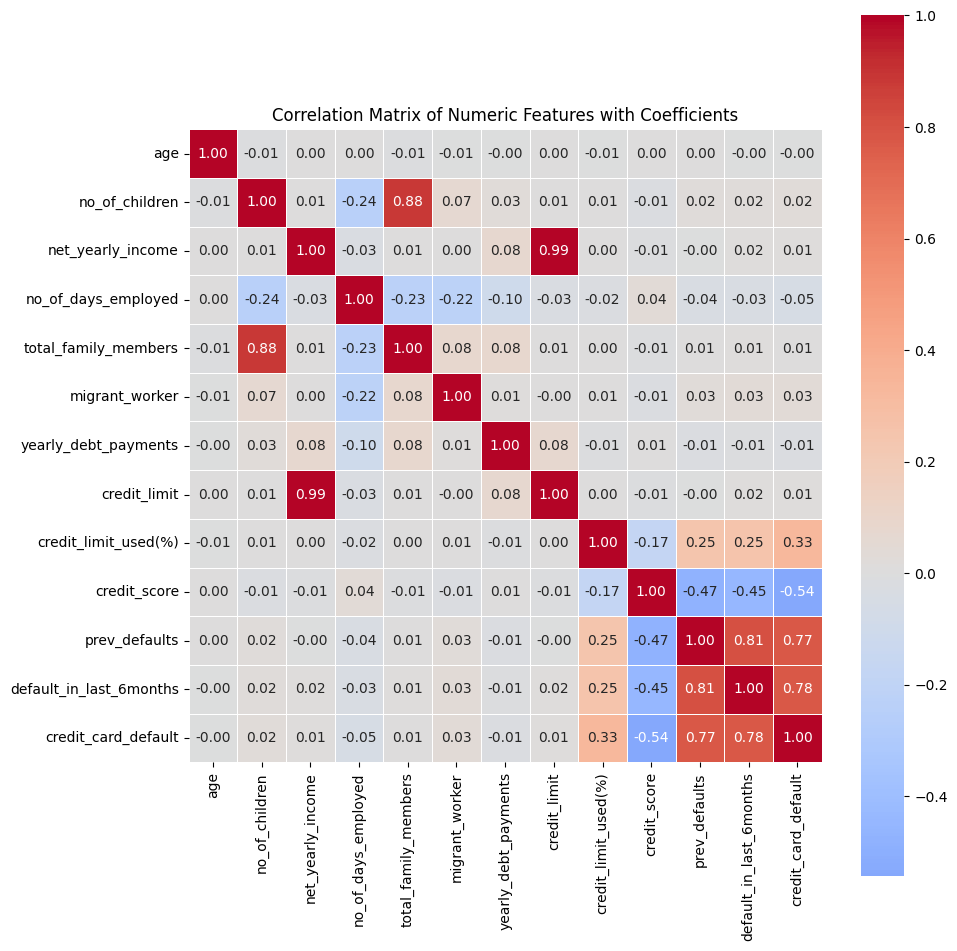

In [12]:
plt.figure(figsize=(10,10))
corr_matrix = train.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=True,      #  show correlation coefficients
    fmt=".2f",       #  format to 2 decimal places
    linewidths=0.5,  # optional: adds gridlines between cells
    square=True      # optional: makes the cells square
)

plt.title("Correlation Matrix of Numeric Features with Coefficients")
plt.tight_layout()
plt.savefig("../../figures/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# Map gender: M=0, F=1
train['gender'] = train['gender'].map({'M': 0, 'F': 1})

# Map owns_car and owns_house: N=0, Y=1
train['owns_car'] = train['owns_car'].map({'N': 0, 'Y': 1})
train['owns_house'] = train['owns_house'].map({'N': 0, 'Y': 1})

In [14]:
train[['gender', 'owns_car', 'owns_house']].head()

,gender,owns_car,owns_house
0,1.0,0.0,1
1,0.0,0.0,1
2,0.0,0.0,1
3,1.0,0.0,1
4,0.0,1.0,1


In [15]:
print(train[['gender', 'owns_car', 'owns_house', 'credit_card_default']].isnull().sum())

gender                   1
owns_car               547
owns_house               0
credit_card_default      0
dtype: int64


In [16]:
# Fill missing values with mode for exploring purposes
# If these features are used to build models, building a regression to fill missingness will be more appropriate
train['gender'].fillna(train['gender'].mode()[0], inplace=True)
train['owns_car'].fillna(train['owns_car'].mode()[0], inplace=True)

C:\Users\Trevor\AppData\Local\Temp\ipykernel_16140\2917172469.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['gender'].fillna(train['gender'].mode()[0], inplace=True)
C:\Users\Trevor\AppData\Local\Temp\ipykernel_16140\2917172469.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [17]:
from scipy.stats import pointbiserialr

categorical_features = ['gender', 'owns_car', 'owns_house']
target_col = 'credit_card_default'

for col in categorical_features:
    corr, p_value = pointbiserialr(train[col], train[target_col])
    print(f"{col} vs {target_col}: correlation = {corr:.2f}, p-value = {p_value:.4f}")

gender vs credit_card_default: correlation = -0.06, p-value = 0.0000
owns_car vs credit_card_default: correlation = -0.02, p-value = 0.0003
owns_house vs credit_card_default: correlation = -0.00, p-value = 0.5656


Class based features appear to have no strong correlation on default.

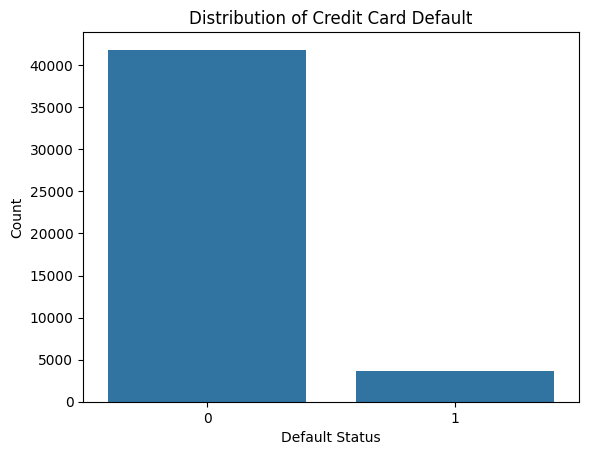

credit_card_default
0    0.918797
1    0.081203
Name: proportion, dtype: float64


In [19]:
sns.countplot(x='credit_card_default', data=train)
plt.title("Distribution of Credit Card Default")
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.savefig("../../figures/distribution_of_default.png", dpi=300, bbox_inches='tight')
plt.show()

print(train['credit_card_default'].value_counts(normalize=True))

Heavy class imbalance, data augmentation may be needed to meaningfully capture credit card defaults.

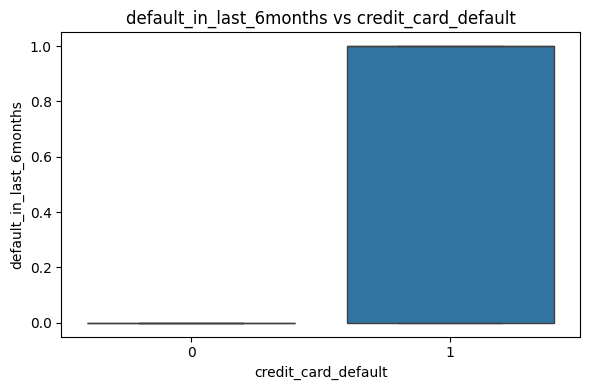

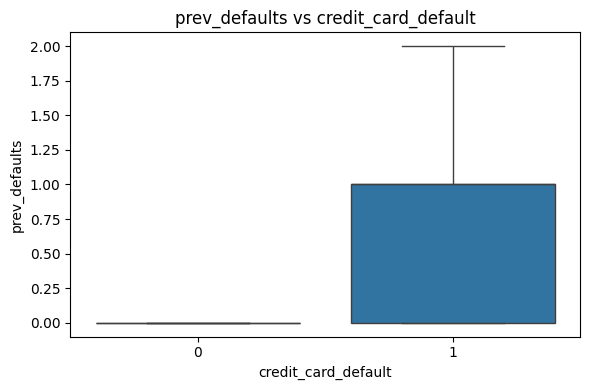

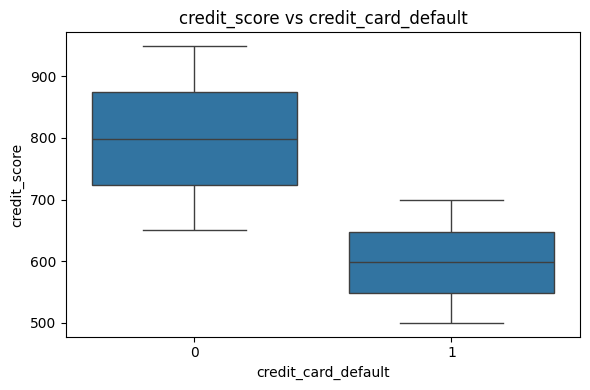

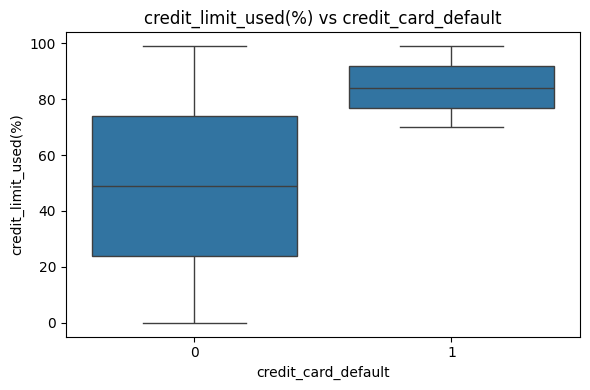

In [21]:
key_features = ['default_in_last_6months', 'prev_defaults', 'credit_score', 'credit_limit_used(%)']
target_col = 'credit_card_default'

for col in key_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target_col, y=col, data=train)
    plt.title(f"{col} vs {target_col}")
    plt.tight_layout()
    plt.show()

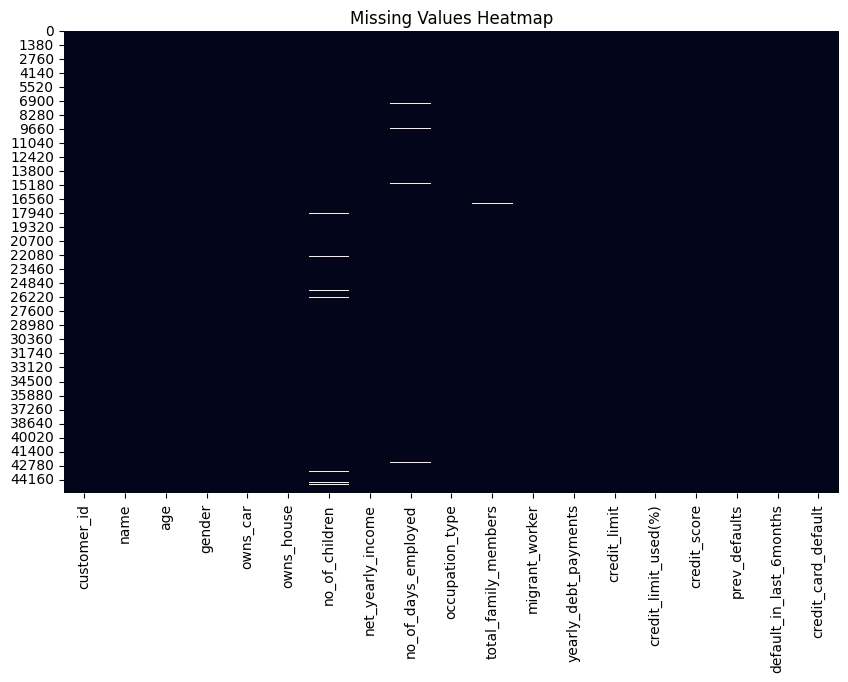

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.savefig("../../figures/missingness_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

missing_summary = train.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)